In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

In [2]:
"""
線形回帰を勾配降下法で解く(nnモジュール利用)
"""

#乱数を固定
torch.manual_seed(0)

# 真の重み
w_true = torch.tensor([1., 2., 3.])

# データの準備
N = 100
X = torch.cat([torch.ones(N, 1),
               torch.randn(N, 2)
              ], dim=1)

noise = torch.randn(N)* 0.5
y = torch.mv(X, w_true) + noise

In [5]:
# 学習
learning_rate = 0.1
loss_list = []
num_epochs = 100

# ネットワーク / optimizer / criterion
net = nn.Linear(in_features=3, out_features=1, bias=False) # 入力が３次元で出力が１次元のネットワーク
optimizer = optim.SGD(net.parameters(), lr=learning_rate) # 確率的勾配降下法(SGD)による最適化を選択
criterion = nn.MSELoss() # 損失関数は MeanSquaredError を採用

# 重みは指定しなくても勝手に準備してくれる
parameters = list(net.parameters())
print(parameters)

[Parameter containing:
tensor([[ 0.5760,  0.3665, -0.3991]], requires_grad=True)]


In [7]:
for epoch in range(1, num_epochs + 1):
    # 前epochでのbackward()で計算された勾配を初期化する
    optimizer.zero_grad()
    
    # 予測の計算
    y_pred = net(X)
    
    mse_loss = criterion(y_pred.view_as(y), y)
    mse_loss.backward()
    loss_list.append(mse_loss.item())
    
    # 勾配の更新
    optimizer.step()

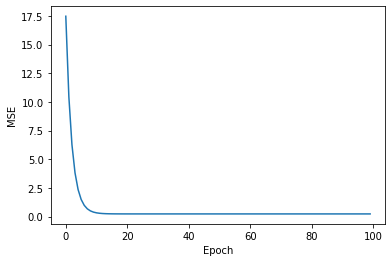

In [8]:
# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()